In [26]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Data Collection Pt. 1
#### To start off, I looked at what game development companies suffered layoffs in 2023. I then chose five well known developers from that list to look into further. The five companies I decided to research were Bungie, EA, 343 Industries, Amazon Games, Riot Games, Epic Games, CD Projekt Red, and Ubisoft. These are all some of the largest and most successful game developers yet they all suffered layoffs in 2023.

## Sources
#### EA Layoffs: https://variety.com/2023/digital/news/electronic-arts-layoffs-employees-1235568329/?sub_action=logged_in
#### Bungie Layoffs: https://www.bloomberg.com/news/articles/2023-10-31/sony-s-bungie-game-unit-cut-jobs-as-destiny-2-popularity-waned#xj4y7vzkg
#### Amazon Layoffs: https://www.cnbc.com/2023/04/04/amazon-lays-off-some-employees-in-its-video-games-unit-read-the-memo.html 
#### 343 Studios Layoffs: https://www.gamesindustry.biz/343-layoffs-affected-95-including-top-directors 
#### Riot Games Layoffs: https://www.gamesindustry.biz/riot-games-lays-off-46-staff-as-part-of-strategic-shifts#:~:text=Valorant%20and%20League%20of%20Legends,in%20the%20past%20few%20weeks 
#### Epic Games Layoffs: https://www.epicgames.com/site/en-US/news/layoffs-at-epic
#### Ubisoft Layoffs: https://www.ign.com/articles/ubisoft-lays-off-124-employees-to-enhance-collective-efficiency
#### CD Projekt Red Layoffs: https://www.ign.com/articles/mass-layoffs-at-cyberpunk-2077-developer-cd-projekt-prompt-new-union-formation

In [69]:
layoffs_df = pd.DataFrame({'Studio': ['Bungie', 'EA', '343 Industries', 'Amazon Games', 'Riot Games', 'Epic Games', 'CD Projekt Red', 'Ubisoft'],
                   'Layoffs': [100, 800, 95, 100, 46, 830, 100, 124]})
layoffs_df

,Studio,Layoffs
0,Bungie,100
1,EA,800
2,343 Industries,95
3,Amazon Games,100
4,Riot Games,46
5,Epic Games,830
6,CD Projekt Red,100
7,Ubisoft,124


### Data Collection Pt. 2
#### Next I needed data on the player count for these companies flagship titles. For every developer except for Riot Games, I was able to use steam charts to measure the player counts since the release of the measured games. For Bungie, I looked at the player count for Destiny 2, for EA I looked at the player count for FIFA, for 343 Industries I looked at the player count for Halo Infinite, for Amazon games I looked at the player count for New World, for Riot Games I looked at the player count for League of Legends, for CD Projekt Red I looked at Cyberpunk 2077, and for Ubisoft I looked at Rainbow Six Siege. 
#### These are all the flagship titles for these companies that have garnered the most players over the years. Amazon Games' New World released in 2021 along with 343 Industry's Halo Infinite, so I looked at the peak player count for each game in 2021 and 2023. I then found the difference between those two player counts. 

## Player Count Calculations
#### Destiny 2 / 2021: 187,504 / 2023: 316,651 / Difference: +129,147
#### FIFA / FIFA 2021: 43,733 / FIFA 2023: 110,757 / Difference: +67,024
#### Halo Infinite / 2021: 147,782 / 2023: 18,003 / Difference: -129,779
#### New World / 2021: 913,027 / 2023: 77,642 / Difference: -835,385
#### League of Legends / 2021: 13,948,310 / 2023: 10,233,639 / Difference: -3,714,671
#### Fortnite / 2021: 35,011,479 / 2023: 25,260,015 / Difference: -9,751,464
#### Cyberpunk 2077 / 2021: 47,115 / 2023: 273,990 / Difference: 226,875
#### Rainbow Six Siege / 2021: 199,830 / 2023: 95,149 / Difference: -104,681


## Sources
#### https://steamcharts.com/app/1085660 - Destiny 2 Players (Bungie)
#### https://steamcharts.com/app/1313860 - FIFA 21 Count (EA)
#### https://steamcharts.com/app/1811260 - FIFA 23 Count (EA)
#### https://steamcharts.com/app/1240440 - Halo Infinite Count (343)
#### https://steamcharts.com/app/1063730 - New World Count (Amazon)
#### https://activeplayer.io/league-of-legends/ - League of Legends (Riot)
#### https://activeplayer.io/fortnite/#google_vignette - Fortnite (Epic Games)
#### https://steamcharts.com/app/1091500 - Cyberpunk 2077 (CD Projekt Red)
#### https://steamcharts.com/app/359550#All - Rainbow Six Siege (Ubisoft)

In [72]:
playercount_df = pd.DataFrame({'Studio': ['Bungie', 'EA', '343 Industries', 'Amazon Games', 'Riot Games', 'Epic Games', 'CD Projekt Red', 'Ubisoft'],
                               'Game': ['Destiny 2', 'FIFA 21-23', 'Halo Infinite', 'New World', 'League of Legends', 'Fortnite', 'Cyberpunk 2077', 'Rainbow Six Siege'],
                               'Player Count Difference': [129147, 67024, -129779, -835385, -3714671, -9751464, 226875, -104681]})
playercount_df

,Studio,Game,Player Count Difference
0,Bungie,Destiny 2,129147
1,EA,FIFA 21-23,67024
2,343 Industries,Halo Infinite,-129779
3,Amazon Games,New World,-835385
4,Riot Games,League of Legends,-3714671
5,Epic Games,Fortnite,-9751464
6,CD Projekt Red,Cyberpunk 2077,226875
7,Ubisoft,Rainbow Six Siege,-104681


### Data Structure
#### I created a merged dataframe that I can call on that contains all the data I collected. I converted it into a .csv because thats what I know how to work with. This will let me easily access the data for whatever charts I end up using in my analysis.

In [73]:
final_project_data = pd.merge(layoffs_df, playercount_df, on='Studio')

In [74]:
final_project_data.to_csv('data_in_hand.csv')

In [75]:
af = pd.read_csv('data_in_hand.csv')
af

,Unnamed: 0,Studio,Layoffs,Game,Player Count Difference
0,0,Bungie,100,Destiny 2,129147
1,1,EA,800,FIFA 21-23,67024
2,2,343 Industries,95,Halo Infinite,-129779
3,3,Amazon Games,100,New World,-835385
4,4,Riot Games,46,League of Legends,-3714671
5,5,Epic Games,830,Fortnite,-9751464
6,6,CD Projekt Red,100,Cyberpunk 2077,226875
7,7,Ubisoft,124,Rainbow Six Siege,-104681


In [76]:
studio_layoffs = af['Layoffs']
studio_layoffs

0    100
1    800
2     95
3    100
4     46
5    830
6    100
7    124
Name: Layoffs, dtype: int64

In [77]:
player_count = af['Player Count Difference']
player_count

0     129147
1      67024
2    -129779
3    -835385
4   -3714671
5   -9751464
6     226875
7    -104681
Name: Player Count Difference, dtype: int64

# Analysis Plan

## Scatter Plot
### I want to use a scatter plot so that I can easily visualize the relationship between the player count difference and the numebr of layoffs. This will let me see more easily differntiate between studios that have had layoffs despite gaining players and studios that have had layoffs in tandem with losing players. 

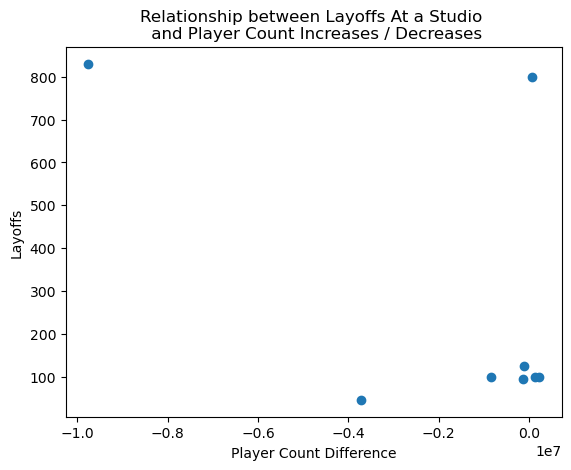

In [85]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = player_count,
            y = studio_layoffs)

ax1.set_title('Relationship between Layoffs At a Studio \n and Player Count Increases / Decreases')
ax1.set_xlabel('Player Count Difference')
ax1.set_ylabel('Layoffs')
matplotlib.pyplot.xlim(, b)
plt.show()

## T-Test
### I want to use a t-test to see if there is any statistical significance to the data I've collected. If the p-value is less than 0.05 then I will know that my data is related and significant, but if it is greater than the 0.05 then I will know that there is little significance the data.

In [83]:
stats.ttest_ind(player_count, studio_layoffs)

TtestResult(statistic=-1.4338815645041165, pvalue=0.17356259247860667, df=14.0)